In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%matplotlib inline

In [3]:
train = pd.read_csv('./housing/train.csv')

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

           ...         WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count      ...        1460.000000  1460.000000    1460.000000  1460.000000   
mean       ...          94.244521    46.660274      21.954110     3.409589   
std        ...         125.338794    66.256028      61.119149    29.317331   
min        ...           0.000000     0.000000       0.000000     0.000000   
25%        ...           0.000000     0.000000       0.000000     0.000000   
50%        ...           0.000000    25.000000       0.000000     0.000000   
75%        ...         168.000000    68.000000       0.000000     0.000000   
max        ...         857.000000   547.000000     552.000000   508.000000   

       ScreenPorch     PoolArea       MiscVal       MoSold       YrSold  \
count  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000   
mean     15.060959     2.758904     43.489041     6.321918  2007.815753   
std      55.757415    40.177307    496.123024     2.703626     1.328095   
min       0.000000     0.000000      0.000000     1.000000  2006.000000   
25%       0.000000     0.000000      0.000000     5.000000  2007.000000   
50%       0.000000     0.000000      0.000000     6.000000  2008.000000   
75%       0.000000     0.000000      0.000000     8.000000  2009.000000   
max     480.000000   738.000000  15500.000000    12.000000  2010.000000   

           SalePrice  
count    1460.000000  
mean   180921.195890  
std     79442.502883  
min     34900.000000  
25%    129975.000000  
50%    163000.000000  
75%    214000.000000  
max    755000.000000  

[8 rows x 38 columns]

### plotting the count of  null  values in the dataset

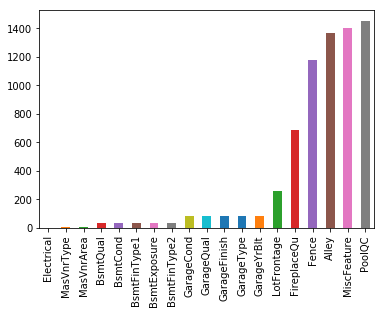

In [6]:
missing = train.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

In [7]:
train.isna().sum()[train.isna().sum() > 0.7*1460]

Alley          1369
PoolQC         1453
Fence          1179
MiscFeature    1406
dtype: int64

### From above data we can see that we have four columns whose more than 70% of data are missing

In [8]:
train['Fence'].unique()

array([nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

In [9]:
train['Alley'].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [10]:
train['PoolQC'].unique()

array([nan, 'Ex', 'Fa', 'Gd'], dtype=object)

In [11]:
train['MiscFeature'].unique()

array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

In [12]:
train['Fence'] = train['Fence'].fillna(value='NoFence')

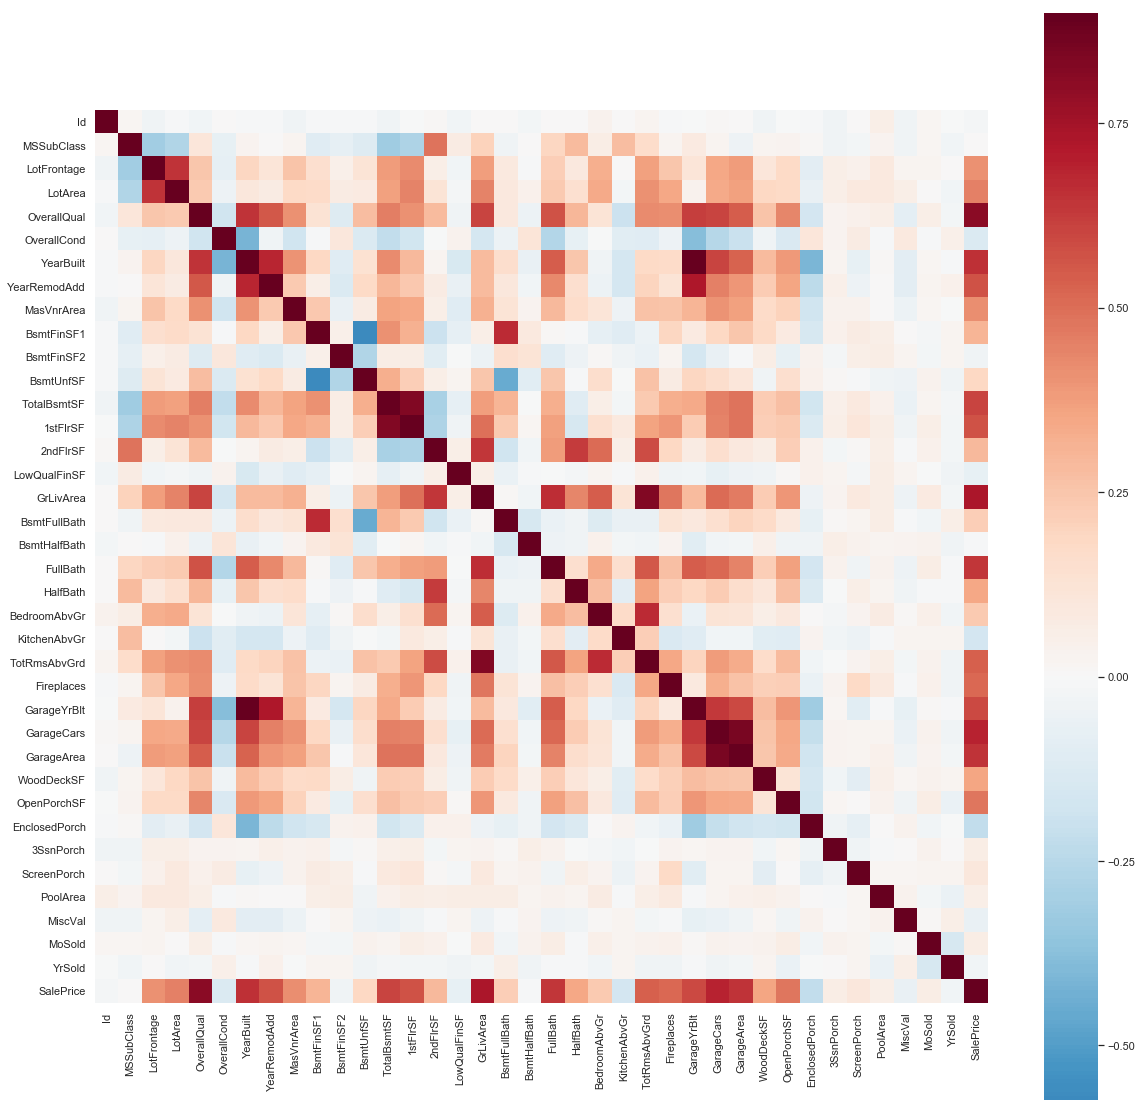

In [34]:
sns.set(rc={'figure.figsize':(20,20)})
sns.heatmap(data = train.corr(method='spearman'),vmax=0.9, square=True,cmap="RdBu_r",center=0)

In [14]:
train.corr().SalePrice

Id              -0.021917
MSSubClass      -0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
SalePrice        1.000000
Name: SalePr

### Correlation between the neumerical vales of the dataset with Sale Price of house

In [15]:
display(train.corr().SalePrice[train.corr().SalePrice > 0.4].sort_values())

Fireplaces      0.466929
MasVnrArea      0.477493
GarageYrBlt     0.486362
YearRemodAdd    0.507101
YearBuilt       0.522897
TotRmsAbvGrd    0.533723
FullBath        0.560664
1stFlrSF        0.605852
TotalBsmtSF     0.613581
GarageArea      0.623431
GarageCars      0.640409
GrLivArea       0.708624
OverallQual     0.790982
SalePrice       1.000000
Name: SalePrice, dtype: float64

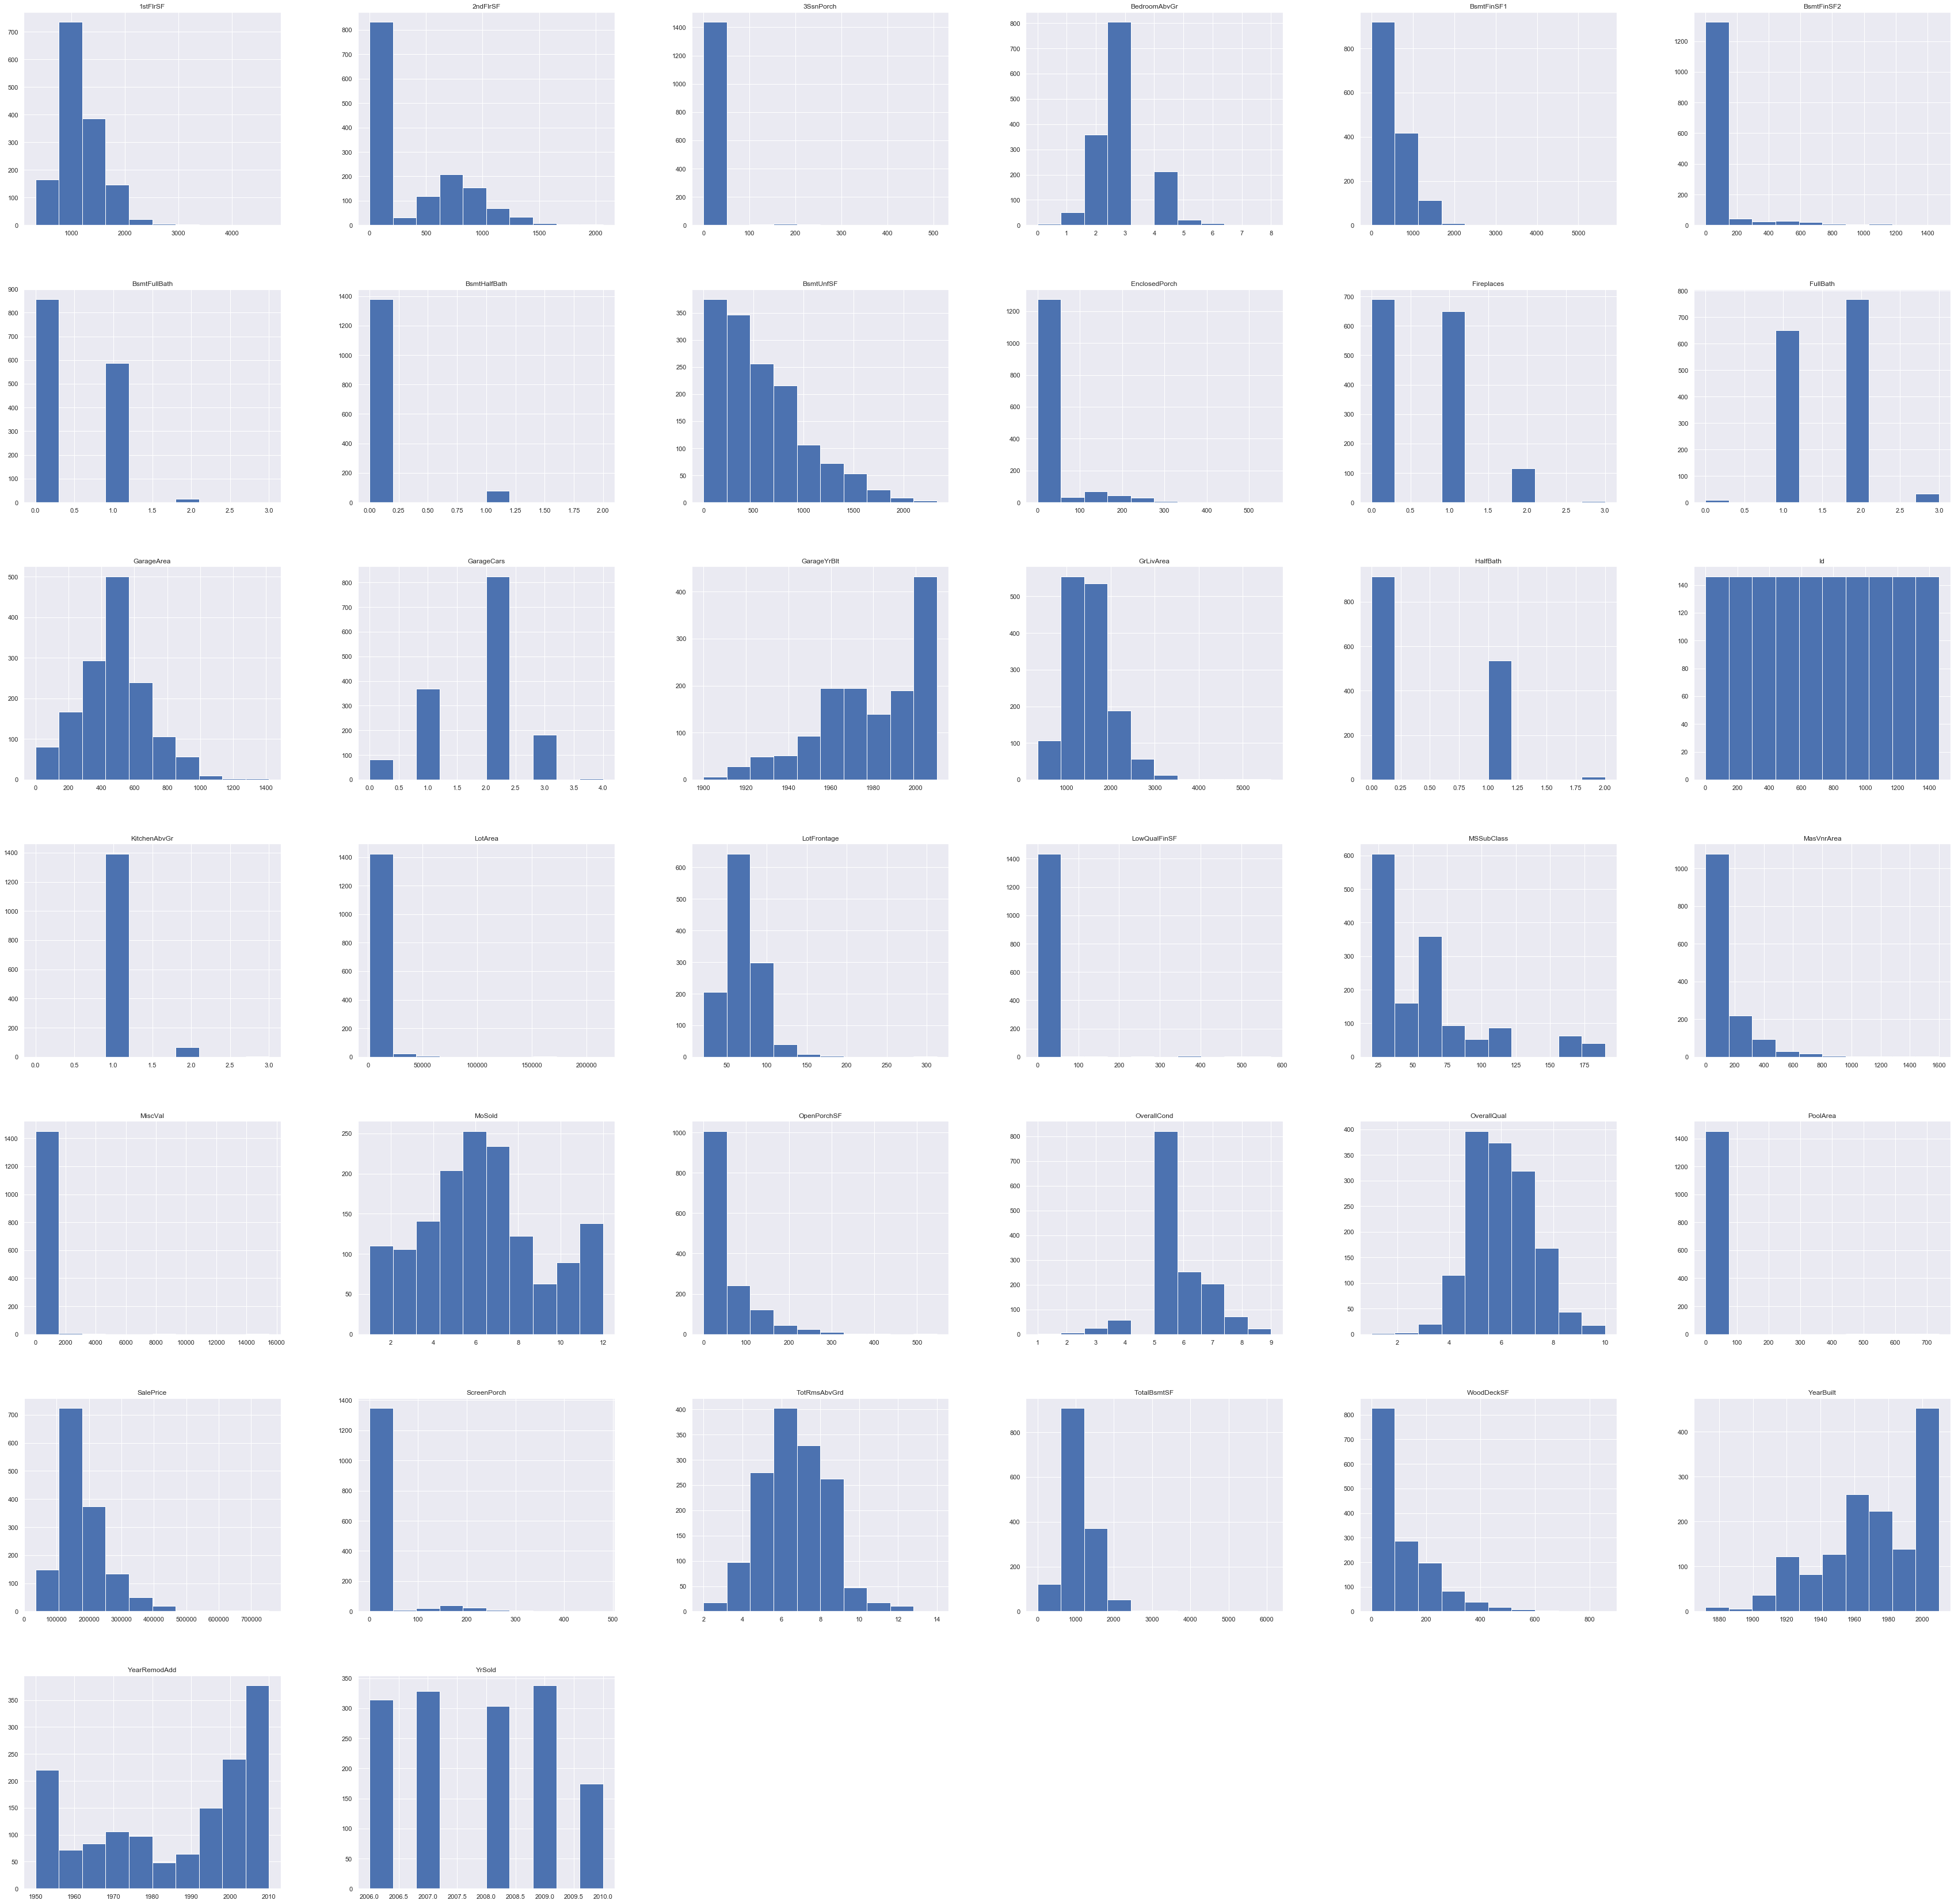

In [16]:
from IPython.display import display
for arr in train.hist():
    for histogram in arr:
        histogram

In [17]:
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities    ...     PoolArea PoolQC    Fence MiscFeature  \
0         Lvl    AllPub    ...            0    NaN  NoFence         NaN   
1         Lvl    AllPub    ...            0    NaN  NoFence         NaN   
2         Lvl    AllPub    ...            0    NaN  NoFence         NaN   
3         Lvl    AllPub    ...            0    NaN  NoFence         NaN   
4         Lvl    AllPub    ...            0    NaN  NoFence         NaN   

  MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
0       0      2   2008        WD         Normal     208500  
1       0      5   2007        WD         Normal     181500  
2       0      9   2008        WD         Normal     223500  
3       0      2   2006        WD        Abnorml     140000  
4       0     12   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [18]:
train.columns.values

array(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'Pav

In [57]:
train = train.drop(['Id'], axis=1)

In [19]:
train.OverallQual.unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2], dtype=int64)

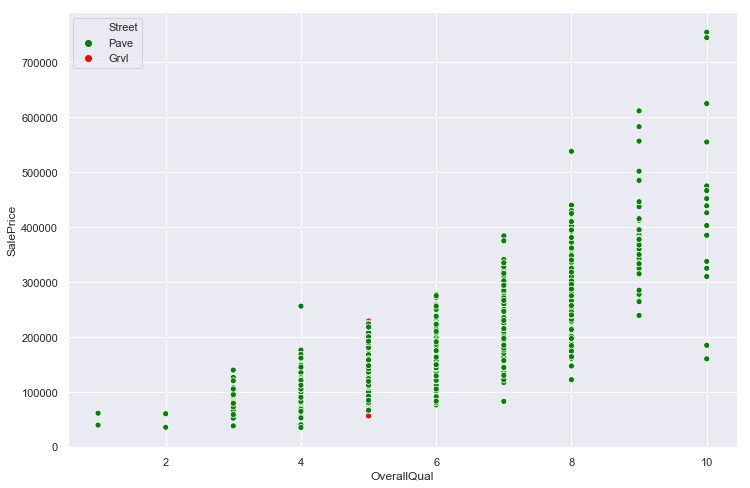

In [20]:
sns.set(rc={'figure.figsize':(12,8)})
sns.scatterplot(x='OverallQual',y='SalePrice',data=train,hue='Street',palette=['green', 'red'])

#### from above plot we can see that SalesPrice and OverallQuality are linearly dpendent  and there are very few Gravelled street and most of street joining houses are Paved

In [21]:
train.Foundation.unique()

array(['PConc', 'CBlock', 'BrkTil', 'Wood', 'Slab', 'Stone'], dtype=object)

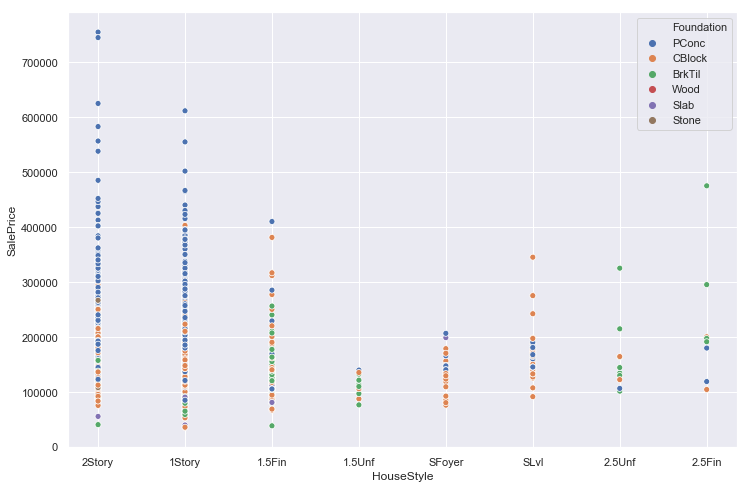

In [22]:
sns.scatterplot(x='HouseStyle',y='SalePrice',data=train,hue='Foundation')

#### 1.  So from above plot we saw that building having foundation of PConc has higher Sales Price than other Foundation  and among them  most  of them are 2 Story and 1 Story buildings.

##  From Correlation data, After Overall quality and  House Style I see that the Garage is prime candidate for Feature which directly affect  the SalePrice of Houses.

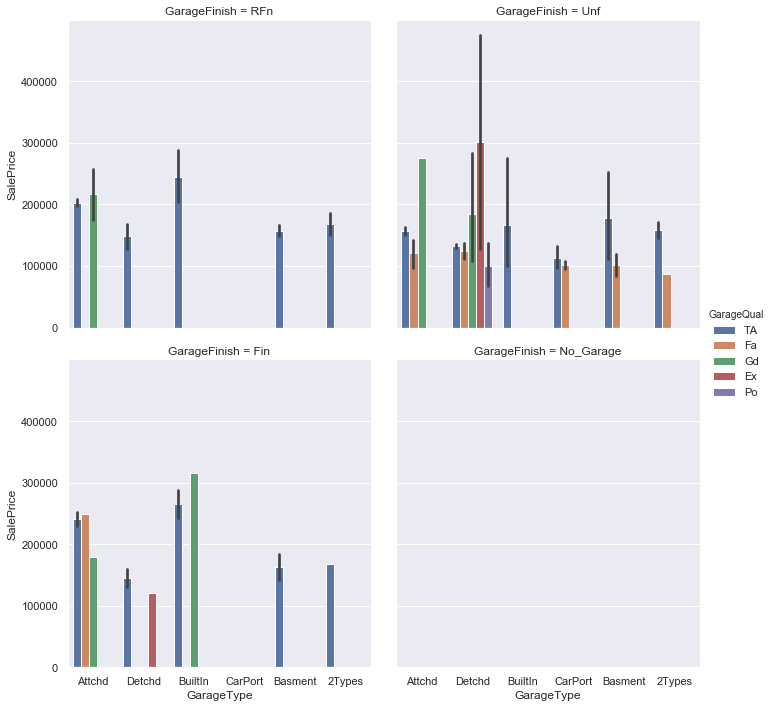

In [35]:
from numpy import mean
sns.catplot(y='SalePrice',x='GarageType',data=train,hue='GarageQual',col='GarageFinish',kind='bar',col_wrap=2,estimator=mean)

### 1. First we can see that there are more houses which have unfurnished and furnished  garage interiror finish than other garage finish type.
### 2. The strange thing we can see that Refurnished garage type has low data  and low price range than others which i think it has something to do with date of first construction of garage and house.

## Finding out the relation between the  first construcion date of house and garage with Sales price

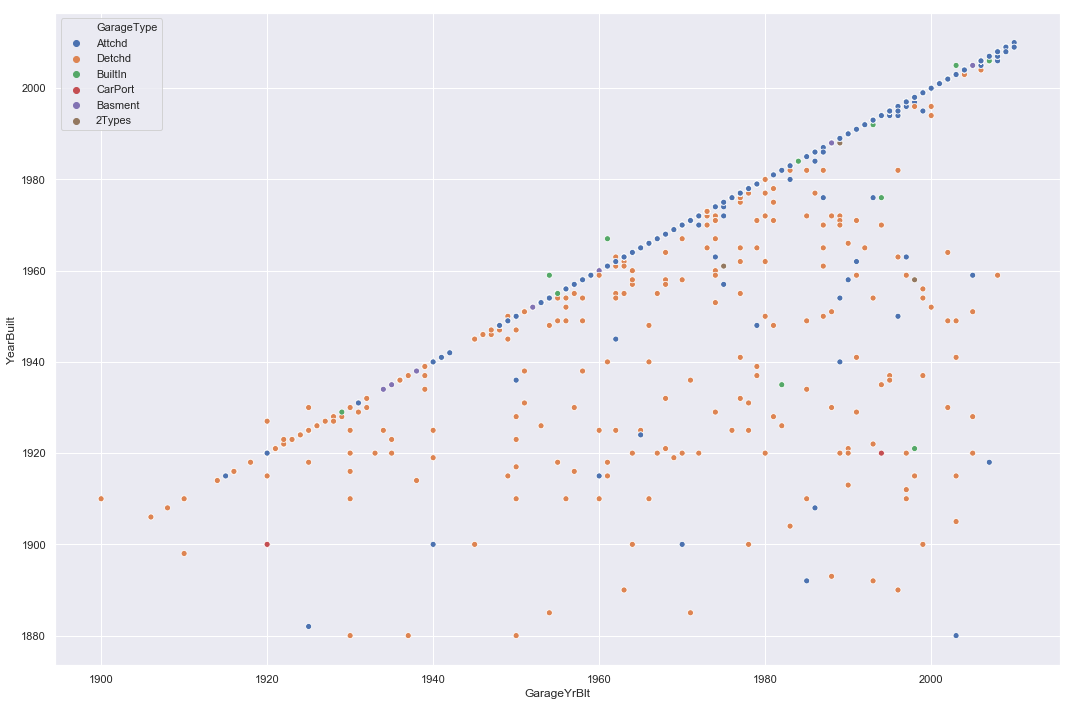

In [24]:
sns.set(rc={'figure.figsize':(18,12)})
sns.scatterplot(x='GarageYrBlt',hue='GarageType',y='YearBuilt',data=train,alpha=1)

### from above plot we can see that GarageBuilt year and House built year has almost linear relation factor which primarily distorting this linear relation ship is mostly Detached garage type

## Generalization

#### Since garage built year and House built year is almost linear if House built year is linear with Sale price then we can say that Garage built year will also be almost linear with Sales price

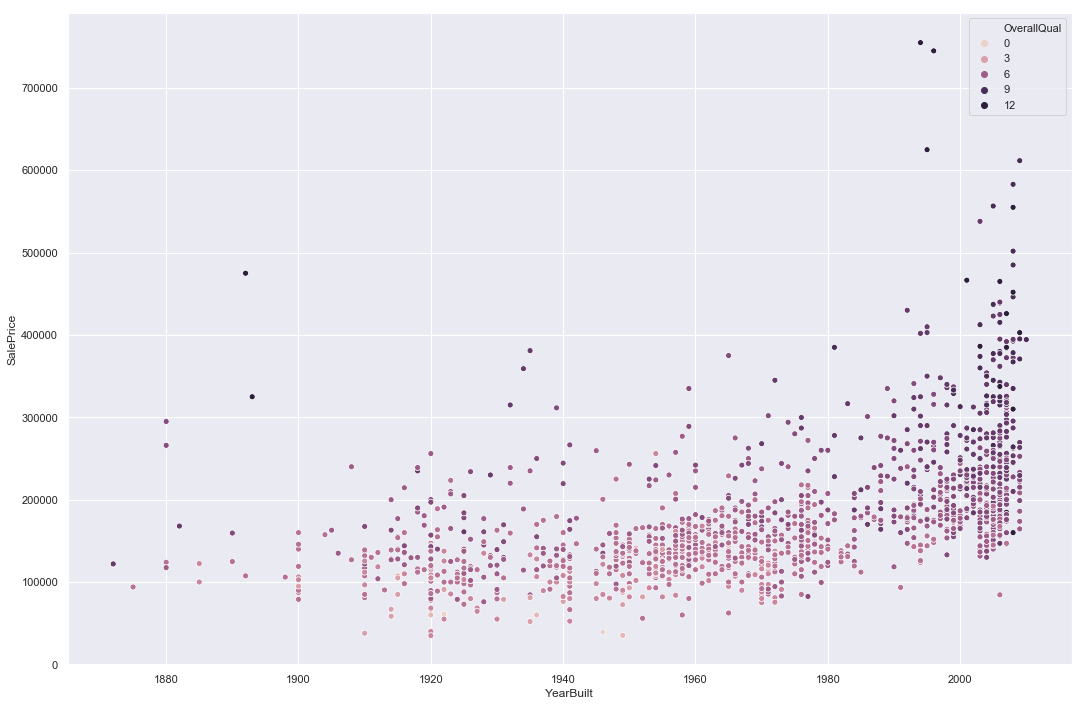

In [25]:
sns.scatterplot(x='YearBuilt',y='SalePrice',hue='OverallQual',data=train,alpha=1)

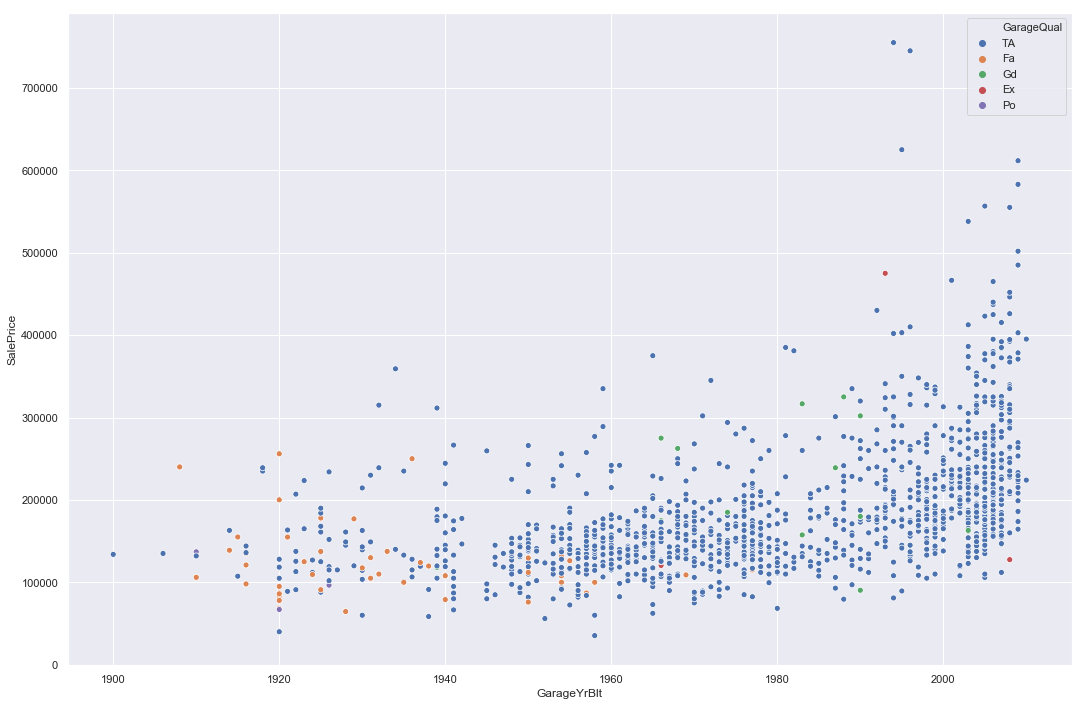

In [26]:
sns.scatterplot(x='GarageYrBlt',y='SalePrice',hue='GarageQual',data=train,alpha=1)

### we can see that realtion between SalePrice and House Built year is not linear rather roughly constant during  range year of 1880 to 1980 and sligtly incresing during year 1980 to 2000

### also we can see that relation between salePrice and GarageBuilt year is same as the realtion between SalePrice and House Built year

### Hence we can say that we can combine these two feature House built year and Garage Built year as they had almost linear relation and provide same pattern of graph when plotting against Sale Price 

In [27]:
for data in train.columns.values:
    if not(data in train.corr().columns.values):
        print(data+':  '+str(train[data].unique()))

MSZoning:  ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street:  ['Pave' 'Grvl']
Alley:  [nan 'Grvl' 'Pave']
LotShape:  ['Reg' 'IR1' 'IR2' 'IR3']
LandContour:  ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities:  ['AllPub' 'NoSeWa']
LotConfig:  ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope:  ['Gtl' 'Mod' 'Sev']
Neighborhood:  ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1:  ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2:  ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType:  ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle:  ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle:  ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl:  ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
Ex

### listing all the uniques values of categorical data in training set

### And Imputing some missing values

In [37]:
train["PoolQC"] = train["PoolQC"].fillna("None")
train["MiscFeature"] = train["MiscFeature"].fillna("None")
train["Alley"] = train["Alley"].fillna("None")
train["Fence"] = train["Fence"].fillna("None")
train["FireplaceQu"] = train["FireplaceQu"].fillna("None")

### LotFrontage : Since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood , so we can fill in missing values by the median LotFrontage of the neighborhood.

### since LotFrontage and SalesPrice has small correlation value so we can ignore it for now and we can impute missing  values later in prediction.

In [44]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    train[col] = train[col].fillna('None')

### GarageType, GarageFinish, GarageCond and GarageQual  : Replacing missing data with None (Since No garage = no garage condition, type , quality and finish)

In [47]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    train[col] = train[col].fillna(0)

### GarageYrBlt, GarageArea and GarageCars : Replacing missing data with 0 (Since No garage = no cars in such garage.)

In [49]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    train[col] = train[col].fillna(0)

for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    train[col] = train[col].fillna('None')

### Since no Basement  is not any basement neumerical values and qualitative values

In [54]:
train["MasVnrType"] = train["MasVnrType"].fillna("None")
train["MasVnrArea"] = train["MasVnrArea"].fillna(0)
train['MSZoning'] = train['MSZoning'].fillna(train['MSZoning'].mode()[0])

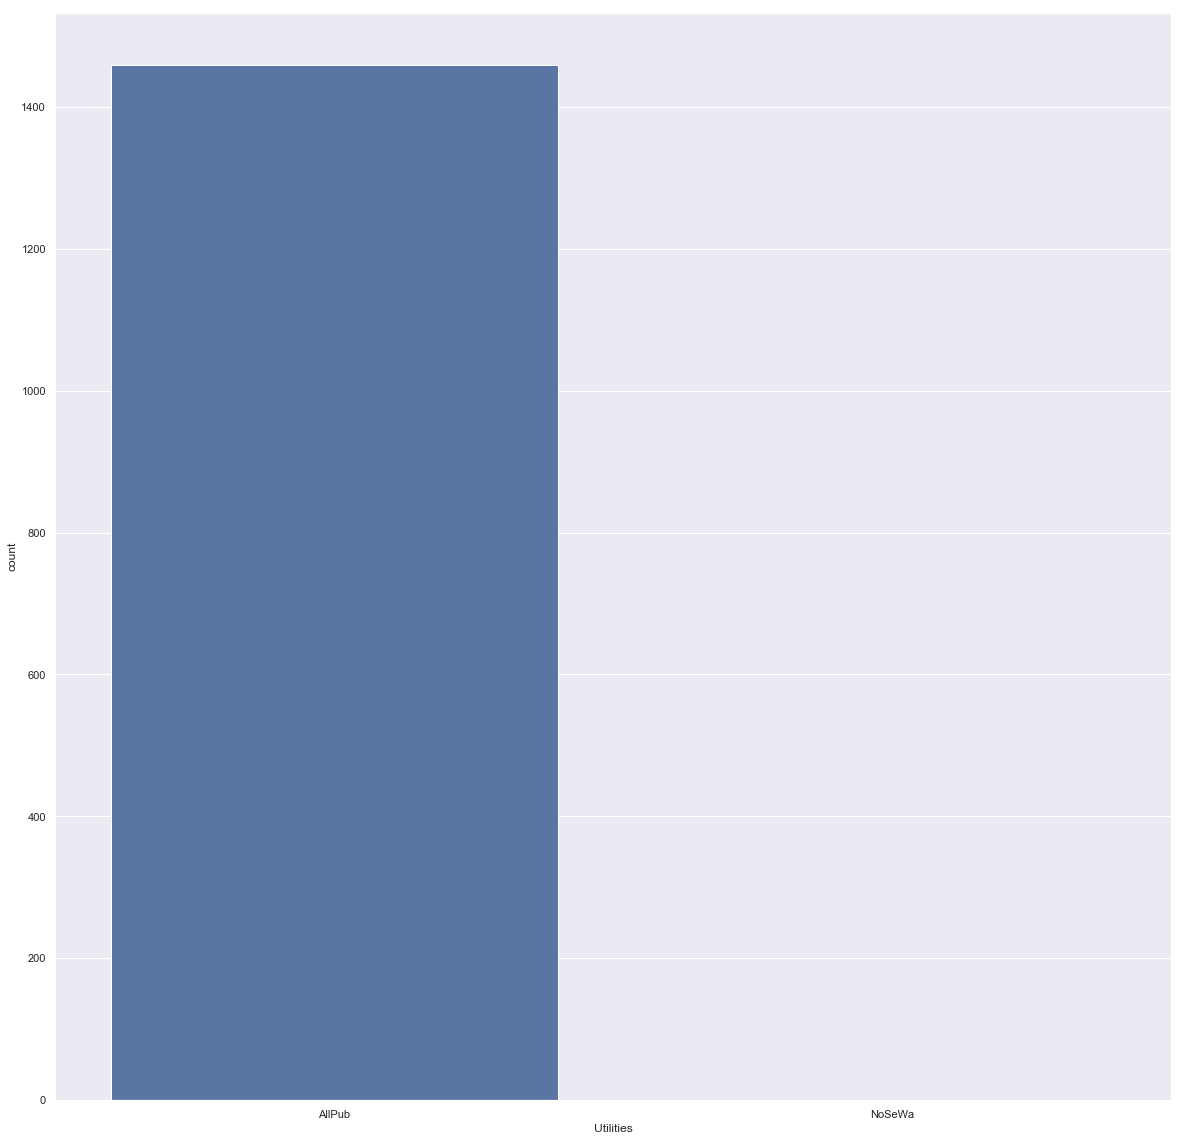

In [55]:
sns.countplot(train.Utilities)

### Utilities : For this categorical feature all records are "AllPub" and only very few are NoSeWa. Hence ,this feature won't help in predictive modelling. We can then safely remove it.

In [56]:
train = train.drop(['Utilities'], axis=1)

In [59]:
train["Functional"] = train["Functional"].fillna("Typ")

train['Electrical'] = train['Electrical'].fillna(train['Electrical'].mode()[0])

train['KitchenQual'] = train['KitchenQual'].fillna(train['KitchenQual'].mode()[0])

train['Exterior1st'] = train['Exterior1st'].fillna(train['Exterior1st'].mode()[0])
train['Exterior2nd'] = train['Exterior2nd'].fillna(train['Exterior2nd'].mode()[0])

train['SaleType'] = train['SaleType'].fillna(train['SaleType'].mode()[0])

train['MSSubClass'] = train['MSSubClass'].fillna("None")

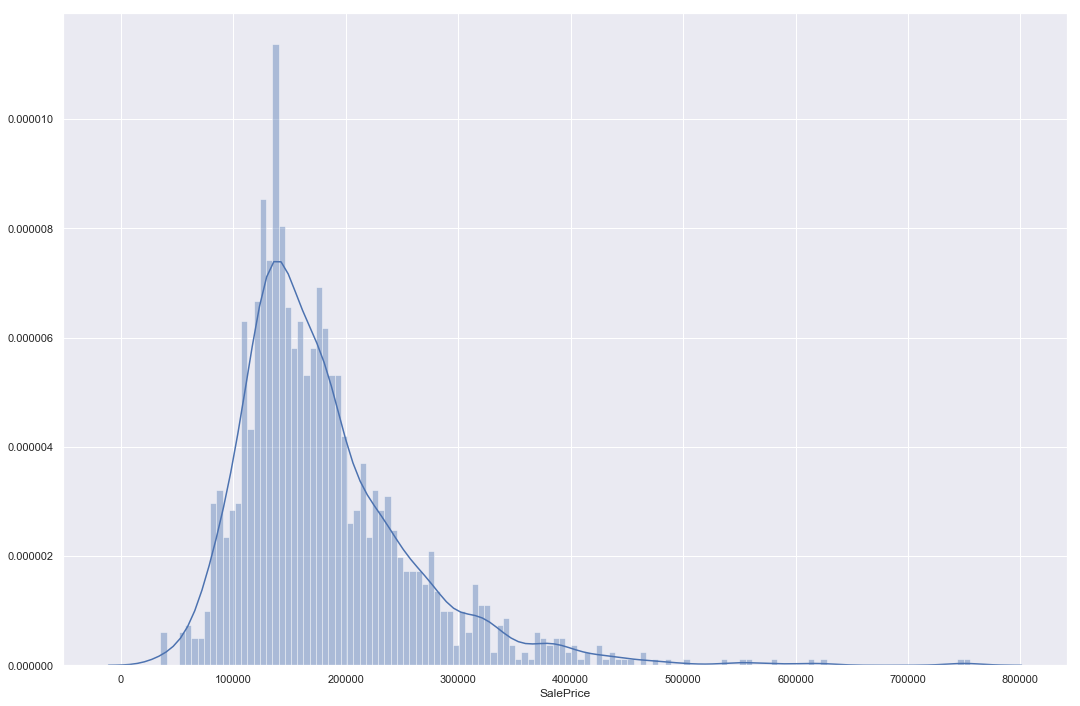

In [28]:
sns.distplot(train['SalePrice'],bins=130)

#### From above plot we can see that  most of the house has sale price around 100k to 200k

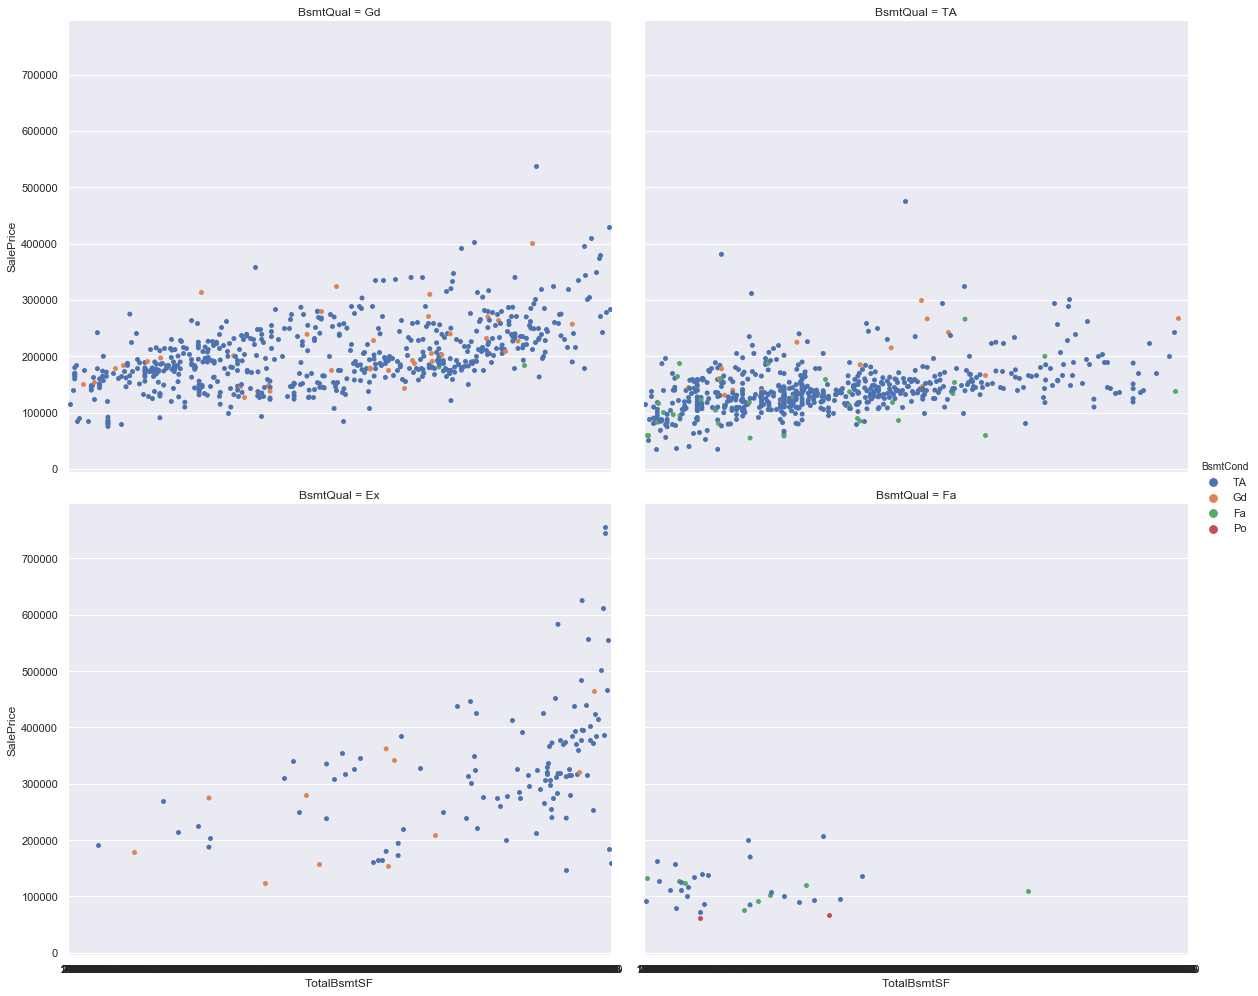

In [29]:
sns.catplot(col='BsmtQual',y='SalePrice',x='TotalBsmtSF',data=train,hue='BsmtCond',col_wrap=2,height=7, aspect=1.2)
# g.set_xticklabels([area for area in range(0,train['TotalBsmtSF'].max(),int(train['TotalBsmtSF'].max()/12))])

### Conclusions of above plots are:
#### 1. Most of the Houses have Good and Moderate basement quality and these basement also has generally higher price 
#### 2. The high prices house have generally has high Total Basement Area

### I think if we go like this, it would take many steps to acutally visualize all the data  and since we all almost all the nan values of data we can visualize it by splitting down the training set into two group :

### Categorical and Numerical

In [64]:
numerical = [f for f in train.columns if train.dtypes[f] != 'object']
categorical = [f for f in train.columns if train.dtypes[f] == 'object']
numerical.remove('SalePrice')
display(len(categorical)+len(numerical))

78

C:\Users\welcome\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


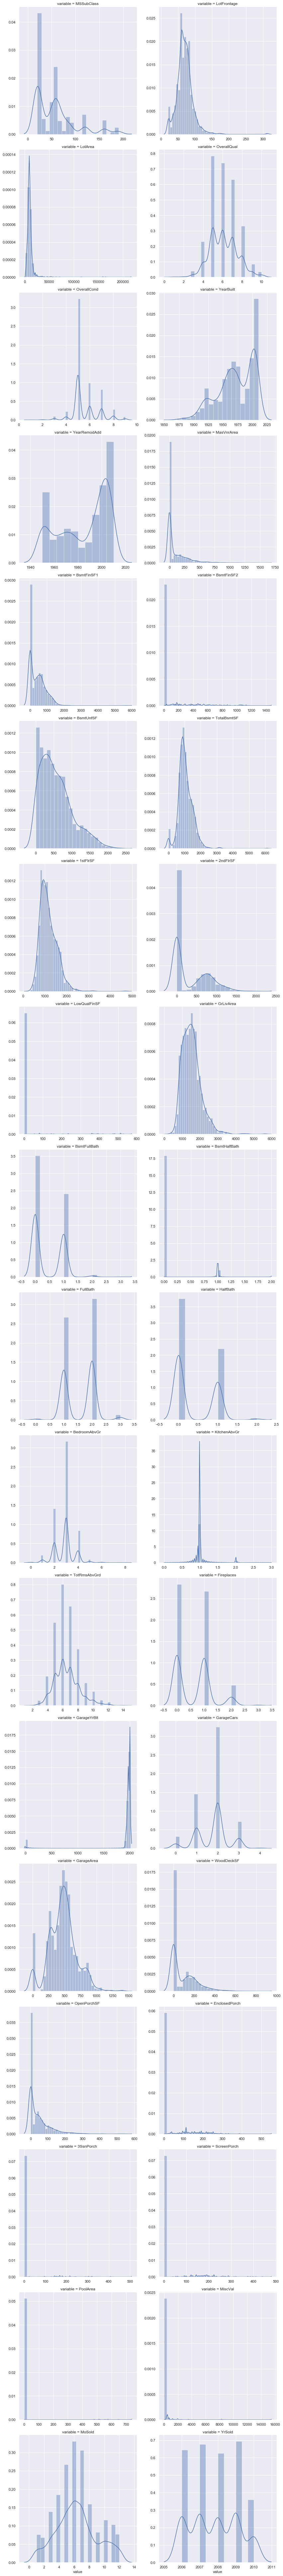

In [65]:
f = pd.melt(train, value_vars=numerical)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False,height=6)
g = g.map(sns.distplot, "value")

## Conlcusion from above distribution plots are:
### 1. Feature like MasVnrArea, BsmtFn2, LowQualFinSF, BsmtHalfBath, GarageBlt, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal have  almost zero value  and very weak distrubution pattern so we can say these Features will not plays important in Building SalePrice
### 2. Features other than above mentioned are  moderatly and highly influencing distribution patter hence we can say that these features build important roles in building  Sale Price

## Plotting the numerical feature against Sales Price to get Deeper Insight

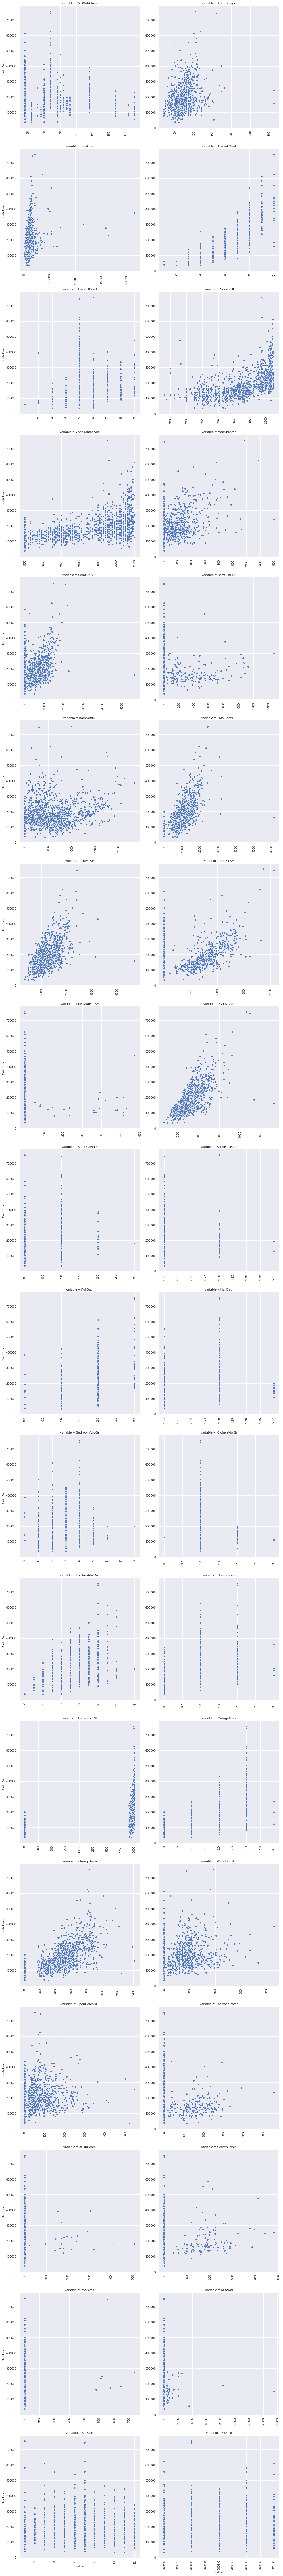

In [68]:
def scatterPlot(x, y, **kwargs):
    sns.scatterplot(x=x, y=y)
    x=plt.xticks(rotation=90)
f = pd.melt(train, id_vars=['SalePrice'], value_vars=numerical)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False,height=7)
g = g.map(scatterPlot, "value", "SalePrice")

###  combining the Conclusion of above two plots we get that features like 3SsnPorch, PoolArea , MiscVal and LotArea   has very weak distrubution pattern against Sales Price  and  most of the values are 0 hence they dont have much impact on Sale Price of House.

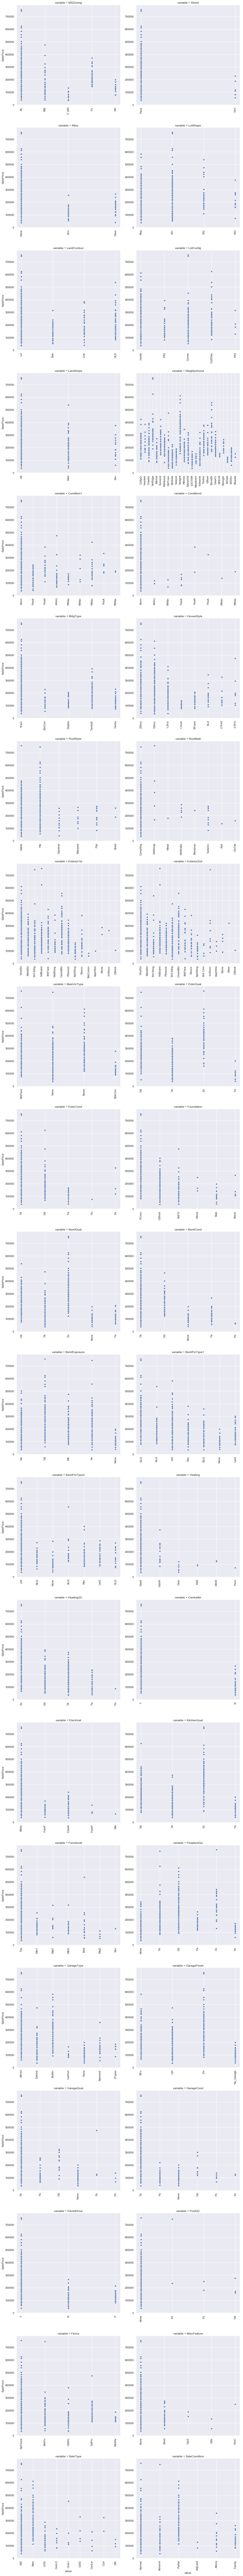

In [69]:
f = pd.melt(train, id_vars=['SalePrice'], value_vars=categorical)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, height=7)
g = g.map(scatterPlot, "value", "SalePrice")

## So from above we can conclude that:
### 1. Since most houses has no pool so PoolQc feature has almost no impact on Price of House
### 2. We can see that houses which has central air System  has generally high price
### 3. Feaures like SaleType , SaleCondition,fence, Paved Drive ,FirePlaceQ, GarageTyp, GarageCnd,Garage finish, KitchenQual,BsmtType, BsmtExposure,BsmtCond,Neighbour,Exterior1st, Exterior2nd,Foundation  has diverse curve against SalePrice hence these features has primary role in predicting Sale Price of Houses

## Since area related features are very important to determine house prices, we add one more feature which is the total area of basement, first and second floor areas of each house

In [70]:
train['TotalSF'] = train['TotalBsmtSF'] + train['1stFlrSF'] + train['2ndFlrSF']

### Now plotting the graph of new feature against SalePrice to know the effectiveness of new feature

C:\Users\welcome\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


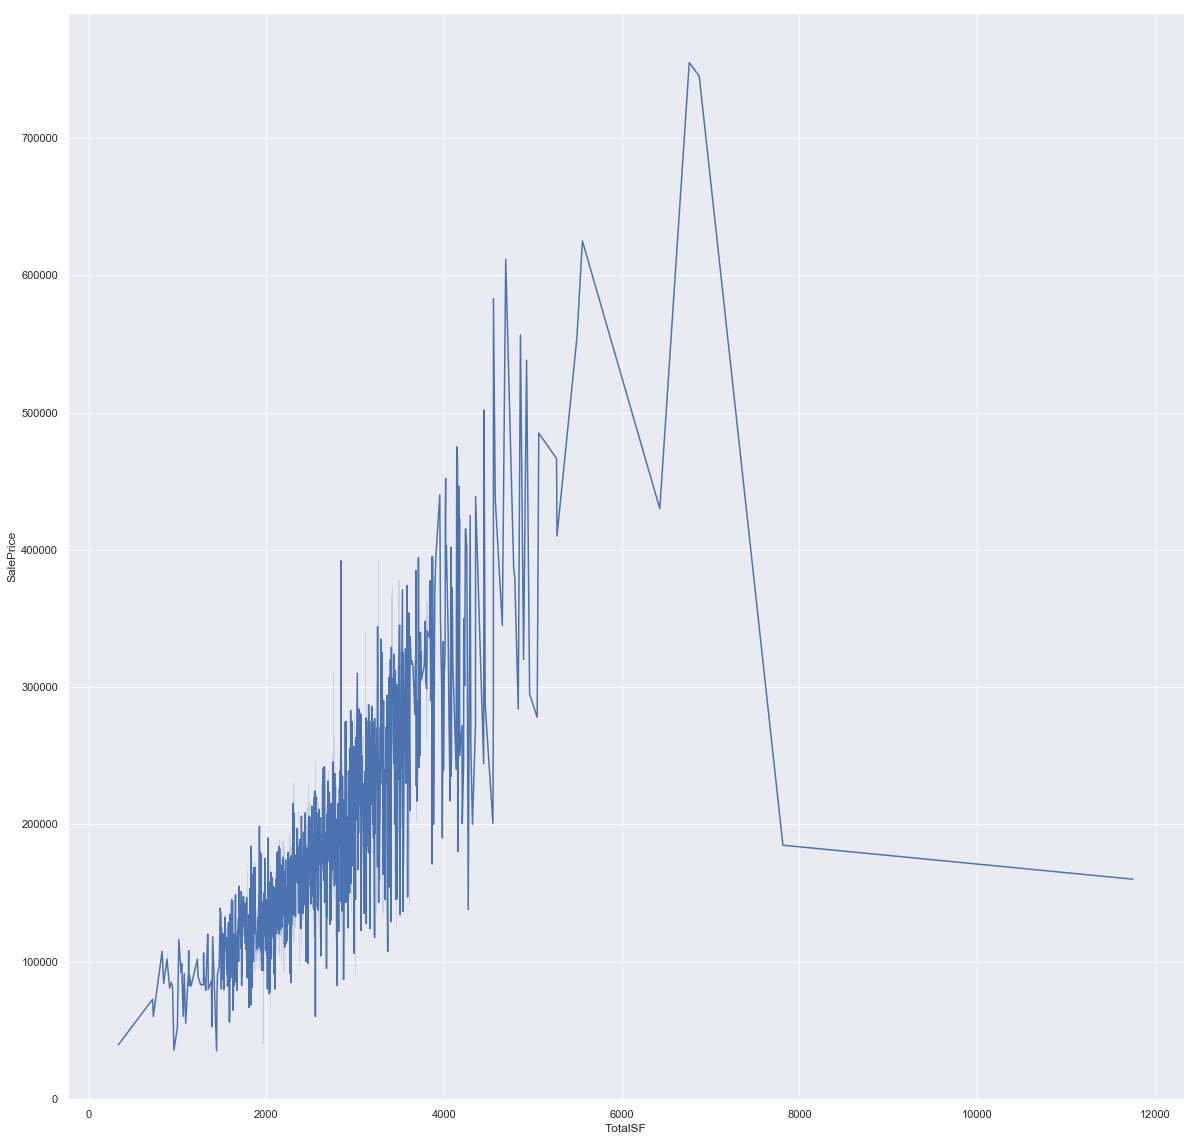

In [71]:
sns.lineplot(x='TotalSF',y='SalePrice',data=train,hue='')

### This above plot provide us new insights which are :

### 1. Houses having moderate total surface area has high sales price 
### 2. Despites of having high surface area we can see they have low houses prices and the reasons behing this may be that houses having more surface area has less garden area , garage built area or no pool area which is affecting the house price 
### 3. In the range of o to 5000 sq feet of surface area we can see that pirce of house of gradually increasing.

## Finding out the True cause of  loss in Sales price  of Houses having higher Total Surface Area 

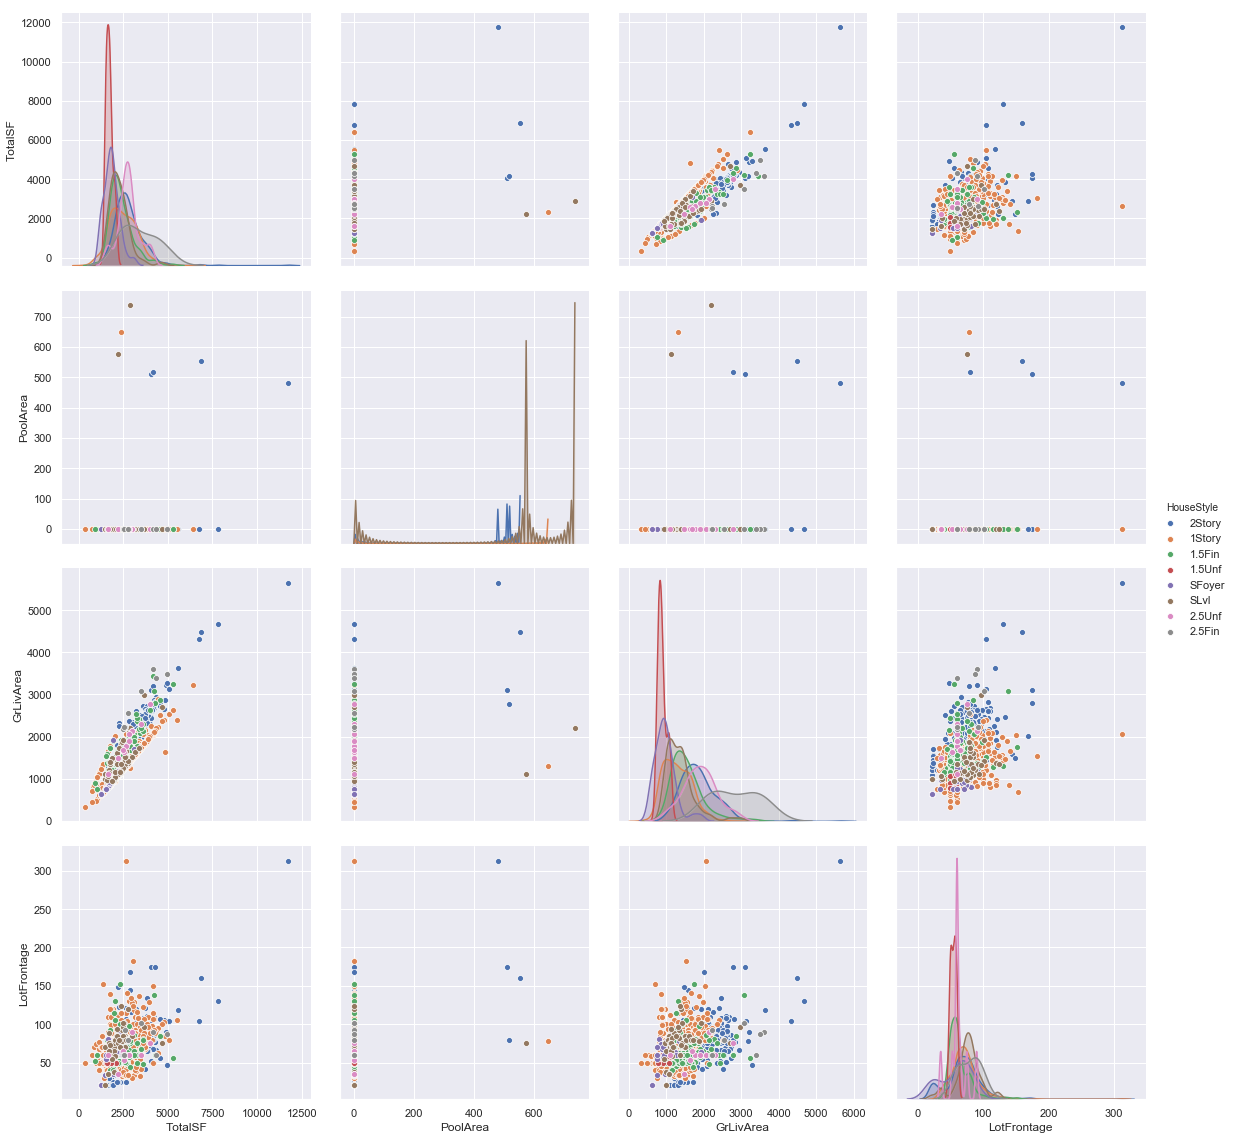

In [76]:
data = pd.DataFrame([])
for col in ['TotalSF','PoolArea','GrLivArea','LotFrontage','HouseStyle']:
    data[col] = train[col]
g = sns.pairplot(data=data,hue='HouseStyle',height=4)

### So we can see that reasons behing loss in Sale Price is having no pool area and less Above grade living area 

## It is possible that correlations shift with change of SalePrice

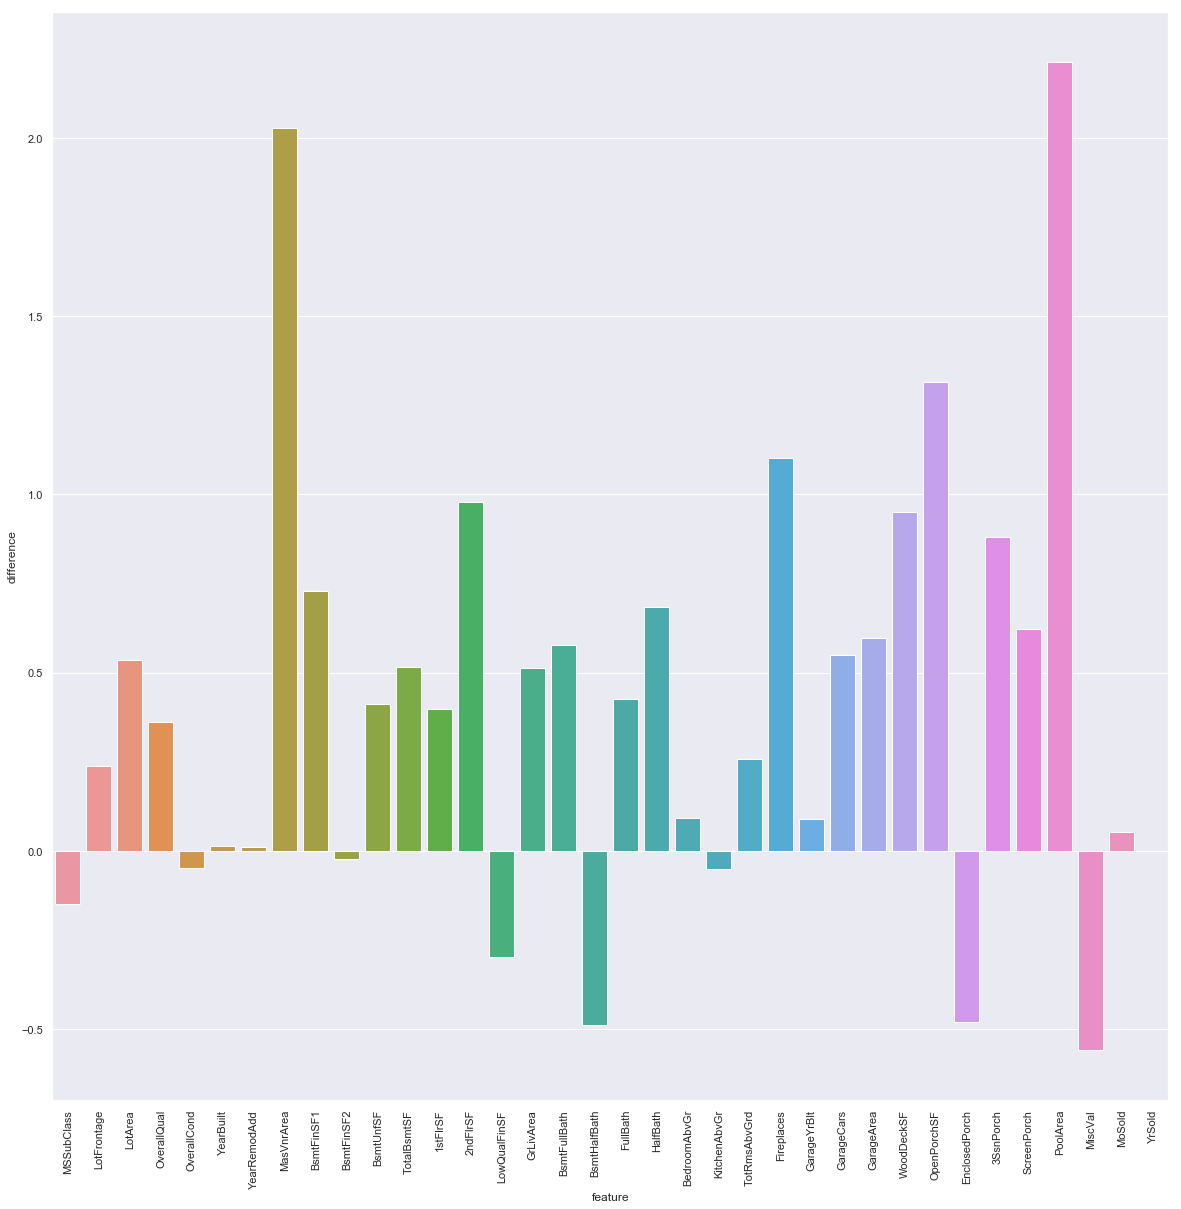

In [77]:
features = numerical

standard = train[train['SalePrice'] < 200000]
pricey = train[train['SalePrice'] >= 200000]

diff = pd.DataFrame()
diff['feature'] = features
diff['difference'] = [(pricey[f].fillna(0.).mean() - standard[f].fillna(0.).mean())/(standard[f].fillna(0.).mean()) for f in features]

sns.barplot(data=diff, x='feature', y='difference')
x=plt.xticks(rotation=90)

### Here houses are divided in two price groups: cheap (under 200000) and expensive. Then means of numerical variables are compared. Expensive houses have pools, better overall qual and condition, open porch and increased importance of MasVnrArea.

## Combining the  Yearsold and Month sold feature to give new feature called SoldDate  

In [79]:
train['SoldDate'] = train['YrSold']+ train['MoSold']/12

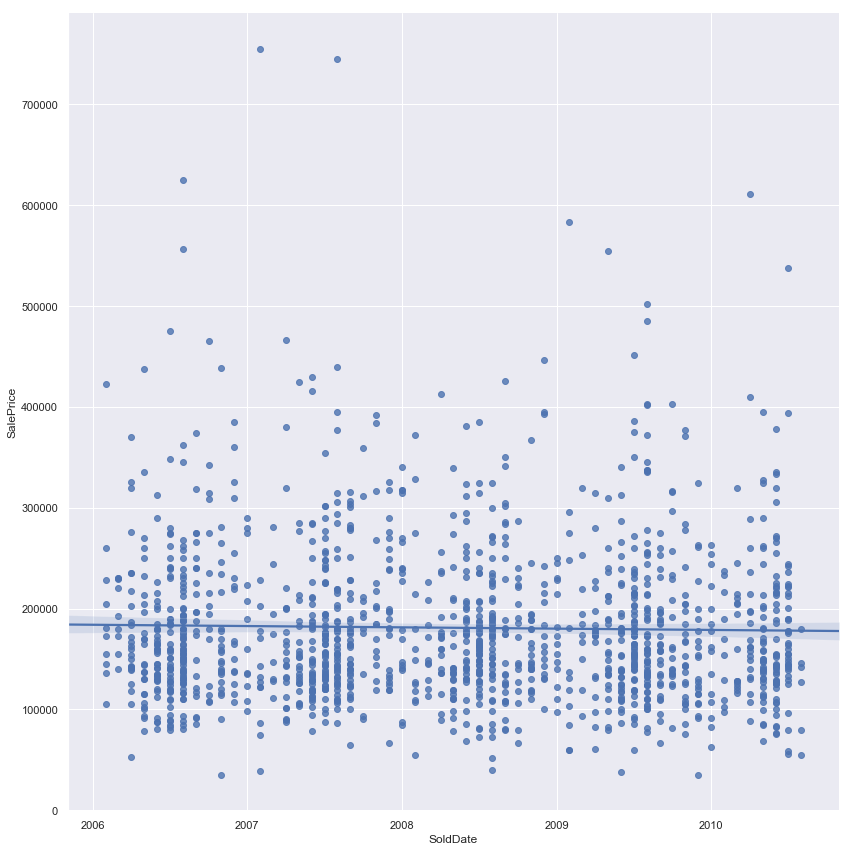

In [86]:
sns.lmplot(x='SoldDate',y='SalePrice',data=train,height=12,)

## Conclusion:

### 1. we can see that SalesPrice and OverallQuality are linearly dpendent and there are very few Gravelled street and most of street joining houses are Paved

### 2. building having foundation of PConc has higher Sales Price than other Foundation and among them most of them are 2 Story and 1 Story buildings.

### 3. we can see that SalesPrice and OverallQuality are linearly dpendent and there are very few Gravelled street and most of street joining houses are Paved

### 4. we can see that there are more houses which have unfurnished and furnished garage interiror finish than other garage finish type.

### 5. The strange thing we can see that Refurnished garage type has low data and low price range than others which i think it has something to do with date of first construction of garage and house.

### 6. Feature like MasVnrArea, BsmtFn2, LowQualFinSF, BsmtHalfBath, GarageBlt, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal have almost zero value and very weak distrubution pattern so we can say these Features will not plays important in Building SalePrice¶

### 7. Features other than above mentioned are moderatly and highly influencing distribution patter hence we can say that these features build important roles in building Sale Price

### 8. we get that features like 3SsnPorch, PoolArea , MiscVal and LotArea has very weak distrubution pattern against Sales Price and most of the values are 0 hence they dont have much impact on Sale Price of House.¶

### 9. Since most houses has no pool so PoolQc feature has almost no impact on Price of House

### 10.  We can see that houses which has central air System has generally high price
### 11.  Feaures like SaleType , SaleCondition,fence, Paved Drive ,FirePlaceQ, GarageTyp, GarageCnd,Garage finish, KitchenQual,BsmtType, BsmtExposure,BsmtCond,Neighbour,Exterior1st, Exterior2nd,Foundation has diverse curve against SalePrice hence these features has primary role in predicting Sale Price of Houses

### 12. Houses having moderate total surface area has high sales price
### 13. Despites of having high surface area we can see they have low houses prices and the reasons behing this may be that houses having more surface area has less garden area , garage built area or no pool area which is affecting the house price
### 14.  In the range of o to 5000 sq feet of surface area we can see that pirce of house of gradually increasing.

### 15. Here houses are divided in two price groups: cheap (under 200000) and expensive. Then means of numerical variables are compared. Expensive houses have pools, better overall qual and condition, open porch and increased importance of MasVnrArea.¶